In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.cluster import KMeans

In [83]:
#upload csv, edit path for own device
df = pd.read_csv('~/COGS118Final/beer_reviews.csv')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [84]:
# list oclumns
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [85]:
# print number of unique values and the dtype per column
for col in df.columns:
  print(col, len(df[col].unique()), df[col].dtype)

brewery_id 5840 int64
brewery_name 5743 object
review_time 1577960 int64
review_overall 10 float64
review_aroma 9 float64
review_appearance 10 float64
review_profilename 33388 object
beer_style 104 object
review_palate 9 float64
review_taste 9 float64
beer_name 56857 object
beer_abv 531 float64
beer_beerid 66055 int64


In [86]:
df['beer_style'].unique()
df['beer_category'] = 0
df['beer_category'] = df['beer_category'].where(~df['beer_style'].str.contains('Ale|Porter|IPA', regex=True), 1)
df['beer_category'] = df['beer_category'].where(~df['beer_style'].str.contains('Lager|Pils', regex=True), 2)
df['beer_category'] = df['beer_category'].where(~df['beer_style'].str.contains('Stout'), 3)
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_category
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,3
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1


In [87]:
# drop na values to let pca work
# could use bayesian distributions to try to replace na vals?
df = df.dropna()
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_category
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,3
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1


In [88]:
# select only int/float features
df = df[['beer_category', 'review_overall', 'review_aroma', 'review_appearance', 'review_profilename', 'review_palate', 'review_taste', 'beer_abv']]
df.shape

(1518478, 8)

In [89]:
# see new df
df.head()

,beer_category,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_abv
0,0,1.5,2.0,2.5,stcules,1.5,1.5,5.0
1,1,3.0,2.5,3.0,stcules,3.0,3.0,6.2
2,3,3.0,2.5,3.0,stcules,3.0,3.0,6.5
3,2,3.0,3.0,3.5,stcules,2.5,3.0,5.0
4,1,4.0,4.5,4.0,johnmichaelsen,4.0,4.5,7.7


In [90]:
# split into x, y, and 3 different sizes for better visual
X = df[['review_overall','review_aroma', 'review_appearance','review_palate', 'review_taste',]]
Y = df['beer_category']


Xa = X[:1000]
Ya = Y[:1000] 

Xb = X[:10000]
Yb = Y[:10000] 

Xc = X[:100000]
Yc = Y[:100000] 

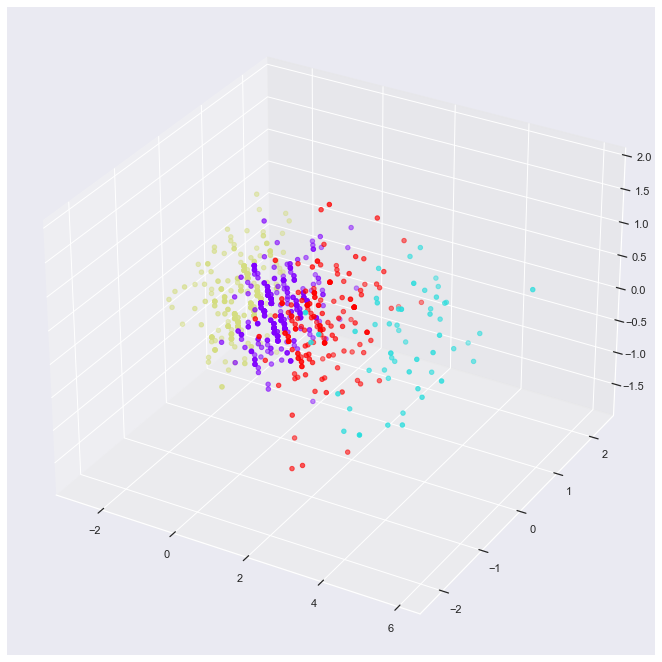

In [120]:
# reduce ot 3 primary components and graph
# havent figured out how to label which those pca are
# prob a simple way to do so with pca methods taught in class iirc
# done for all 4 different sizes, each 10^n and full size
# find package to make plot rotatable? 
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(Xa)
X1 = pca1.transform(Xa)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Ya, [0, 1, 2, 3])
#ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap='rainbow',
#           edgecolor='k')

kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=kmeans.labels_, cmap='rainbow')

plt.show()

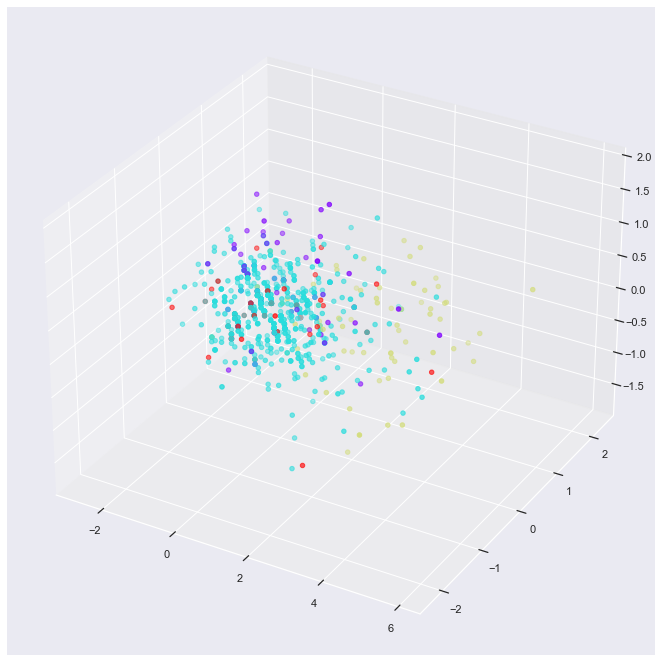

In [121]:
fig1 = plt.figure(figsize=(12,9))
ax = Axes3D(fig1)

ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap='rainbow')
plt.show()

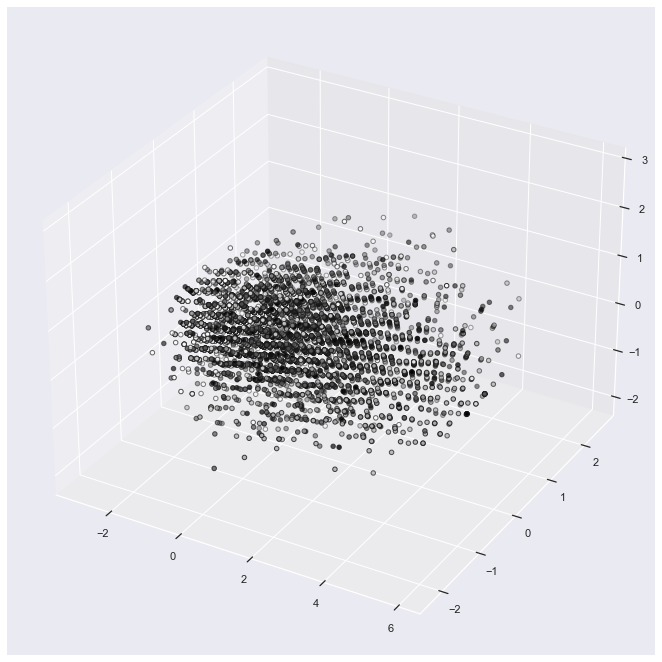

In [92]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(Xb)
X1 = pca1.transform(Xb)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Yb, [0, 1, 2, 3])
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.binary_r,
           edgecolor='k')

plt.show()

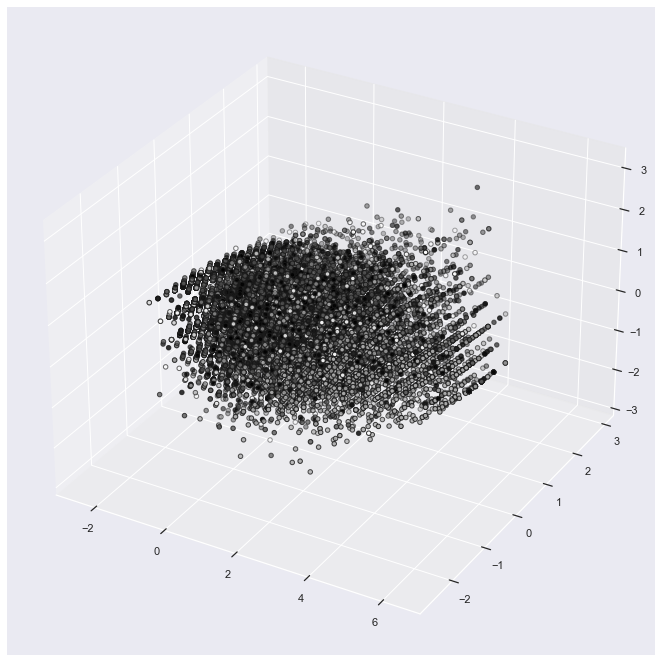

In [93]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(Xc)
X1 = pca1.transform(Xc)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Yc, [0, 1, 2, 3])
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.binary_r,
           edgecolor='k')

plt.show()

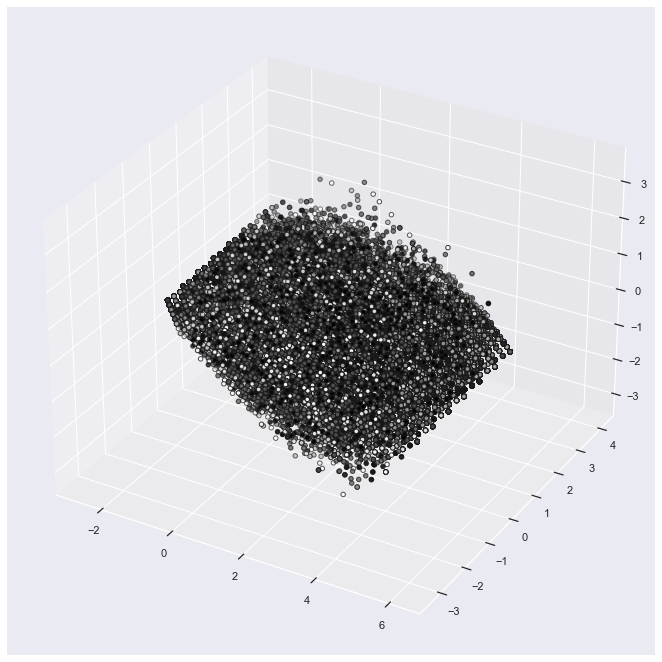

In [94]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(X)
X1 = pca1.transform(X)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Y, [0, 1, 2, 3])
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.binary_r,
           edgecolor='k')

plt.show()

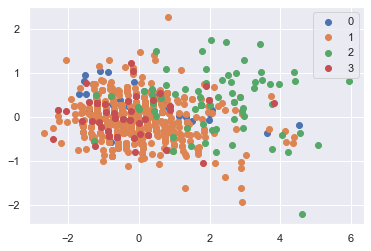

In [95]:
# same as before but for 2 components. much easier graph to see
# unfortunately also makes it kinda obvious not enough difference
# could use bayesian techniques to compare and see if distributions really different?
# if that is a valid/useful way of showing what we learned
pca2 = decomposition.PCA(n_components=2)
pca2.fit(Xa)
X2 = pca2.transform(Xa)

fig, ax = plt.subplots()
for y in np.unique(Ya):
    i = np.where(Ya == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()

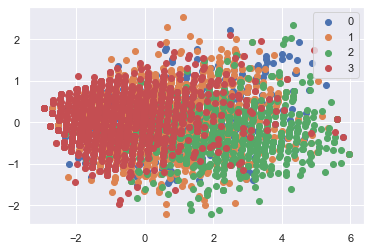

In [96]:
pca2 = decomposition.PCA(n_components=2)
pca2.fit(Xb)
X2 = pca2.transform(Xb)

fig, ax = plt.subplots()
for y in np.unique(Yb):
    i = np.where(Yb == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()

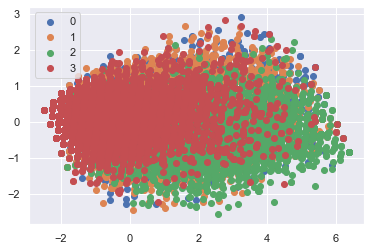

In [97]:
pca2 = decomposition.PCA(n_components=2)
pca2.fit(Xc)
X2 = pca2.transform(Xc)

fig, ax = plt.subplots()
for y in np.unique(Yc):
    i = np.where(Yc == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()

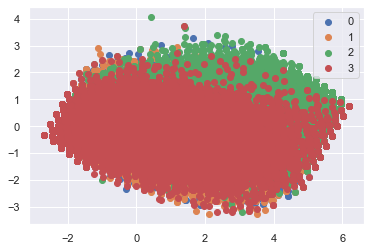

In [98]:
pca2 = decomposition.PCA(n_components=2)
pca2.fit(X)
X2 = pca2.transform(X)

fig, ax = plt.subplots()
for y in np.unique(Y):
    i = np.where(Y == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()